In [23]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)
import funcs

import importlib
importlib.reload(funcs)

from matplotlib import rc
rc('font', size=12)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)

# Reconstruct tracks

In [24]:
df_cells, df_links = funcs.process_csv(vertices = 'FeatureAndTagTable-vertices.csv',
                edges = 'FeatureAndTagTable-edges.csv')

Loading vertices csv...
Restructuring cells dataframe...
Loading edges csv...
Restructuring links dataframe...
Appending track id to links...
Done.


Mean cell radius:  3.3471152456329722


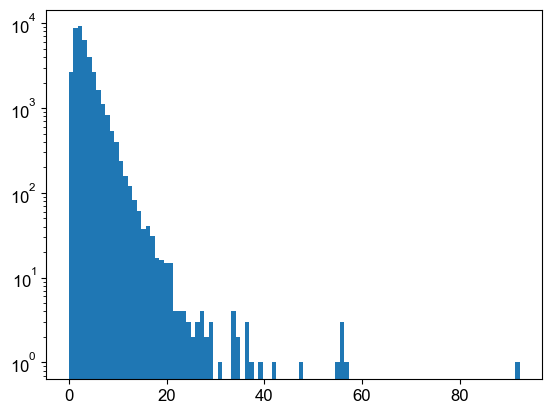

In [25]:
# check distribution of speeds from links

h, b, _ = plt.hist(df_links.speed, bins=100, log=True)
print('Mean cell radius: ', np.mean(df_cells.r))

In [26]:
df_links = funcs.remove_division_links(df_cells, df_links)
df_links = funcs.remove_big_jumps(df_links, thr=12)
df_cells = funcs.remove_unlinked_cells(df_cells, df_links)

Removing links for dividing cells...
Removing links for jumps bigger than 12
Removing disconnected cells (those that do not appear in links)...


In [27]:
tracks = funcs.reconstruct_tracks(df_links)
df_cells = funcs.append_track_id(df_cells, tracks)
df_cells = funcs.append_n_spots_track(df_cells)
df_cells = funcs.append_speed_tracks(df_cells, df_links)
df_cells = funcs.cleanup_cells_df(df_cells)

Reconstructing cell tracks...


100%|█████████████████████████████████████████████████████████████████████████████| 2699/2699 [00:05<00:00, 522.18it/s]

Creating cell_id column in cells dataframe...
Compute track length...
Compute track speed...
Cleanup


In [28]:
print(np.max(df_cells['mean-ch1']))
print(np.max(df_cells['mean-ch2']))

1193.3014354066986
3123.776243093923


In [ ]:
print('Number of cells:', len(set(df_cells.cell_id)))
df_cells=funcs.set_channels_threshold(df_cells, lims_ch1=[50,500], lims_ch2=[5,5000])
print('Number of cells:', len(set(df_cells.cell_id)))

Number of cells: 2699
[50, 500] [5, 5000]


 10%|███████▋                                                                     | 271/2699 [00:00<00:01, 1363.31it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


 20%|███████████████▊                                                             | 553/2699 [00:00<00:01, 1391.69it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


 31%|████████████████████████                                                     | 844/2699 [00:00<00:01, 1427.03it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


 42%|███████████████████████████████▊                                            | 1130/2699 [00:00<00:01, 1397.33it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]



 47%|███████████████████████████████████▊                                        | 1270/2699 [00:00<00:01, 1291.99it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]



 52%|███████████████████████████████████████▉                                     | 1401/2699 [00:01<00:01, 848.76it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


 61%|███████████████████████████████████████████████                              | 1651/2699 [00:01<00:01, 986.41it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


 75%|████████████████████████████████████████████████████████▊                   | 2018/2699 [00:01<00:00, 1102.38it/s]

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


In [15]:
print(np.max(df_cells['mean-ch1']))
print(np.max(df_cells['mean-ch2']))

1193.3014354066986
3123.776243093923


In [8]:
df_tracks = funcs.compute_track_info(df_cells)

Computing track info...


100%|█████████████████████████████████████████████████████████████████████████████| 2695/2695 [00:03<00:00, 746.79it/s]


In [9]:
df_cells

cell_id  n_spots         r           x           y        z   t  \
0            0       16  2.794911   81.356969  232.460616  47.7744   0   
1            0       16  2.880509   83.495068  231.684702  42.2478   1   
...        ...      ...       ...         ...         ...      ...  ..   
39913     2698       17  3.462760  163.886823  284.950650  61.2240  67   
39914     2698       17  3.540637  165.645633  285.218302  61.1320  68   

          speed    mean-ch1    mean-ch2  
0      5.976355  371.487544  145.565836  
1      2.407157  374.020619  161.606529  
...         ...         ...         ...  
39913  1.781435  130.951844  155.398566  
39914       NaN  130.545019  147.696360  

[39915 rows x 10 columns]

In [10]:
df_tracks

cell_id  len  start_t  end_t     speed         ch1         ch2  \
0           0   16        0     15  3.143123  364.814191  175.720533   
1           1   11        0     10  2.863115  136.251535  209.893819   
...       ...  ...      ...    ...       ...         ...         ...   
2693     2697   15      107    121  2.777348  171.557258   81.936485   
2694     2698   17       52     68  1.635463  131.635002  158.965476   

        end2end    cumdist  
0     21.417111  47.146838  
1     11.745186  28.631148  
...         ...        ...  
2693  18.518583  38.882874  
2694   6.198670  26.167403  

[2695 rows x 9 columns]

### save

In [11]:
# del df_links, tracks

df_cells.to_csv('cells_no_div_no_jumps2.csv')
df_tracks.to_csv('tracks_no_div_no_jumps2.csv')

# df_cells.to_csv('cells_no_div.csv')
# df_tracks.to_csv('tracks_no_div.csv')

# Some plots: compare dataset with and without jumps

In [12]:
# df_cells = pd.read_csv('cells_no_div.csv', index_col=0)
# df_tracks = pd.read_csv('tracks_no_div.csv', index_col=0)

df_cells = pd.read_csv('cells_no_div_no_jumps2.csv', index_col=0)
df_tracks = pd.read_csv('tracks_no_div_no_jumps2.csv', index_col=0)

T_thr = [150,200]

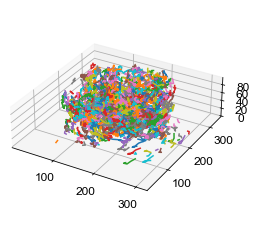

In [13]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

cells_id = list(set(df_cells.cell_id))
for cell_id in cells_id[:1000]:
    track = df_cells[df_cells.cell_id==cell_id][['x','y','z']].to_numpy()
    ax.plot3D(track[:,0],track[:,1],track[:,2])
    
xlims = (np.min(df_cells.x),np.max(df_cells.x))
ylims = (np.min(df_cells.y),np.max(df_cells.y))
zlims = (np.min(df_cells.z),np.max(df_cells.z))
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_zlim(zlims)
ax.set_box_aspect((xlims[1]-xlims[0],ylims[1]-ylims[0],zlims[1]-zlims[0]))

Text(0, 0.5, 'Speed (um/tp)')

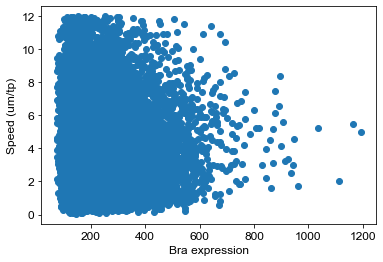

In [14]:
fig, ax = plt.subplots()
ax.plot(df_cells['mean-ch1'].values,df_cells.speed,'o')
ax.set_xlabel('Bra expression')
ax.set_ylabel('Speed (um/tp)')
# ax.set_ylim(0,20)
# ax.set_xlim(100,700)

C:\Users\anlas\AppData\Local\Temp/ipykernel_468/905845062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cells['T_state'][df_cells['mean-ch1'].values>=T_thr[1]] = 'T+'
C:\Users\anlas\AppData\Local\Temp/ipykernel_468/905845062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cells['T_state'][(df_cells['mean-ch1'].values>=T_thr[0])&(df_cells['mean-ch1'].values<T_thr[1])] = 'Tmid'
C:\Users\anlas\AppData\Local\Temp/ipykernel_468/905845062.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<AxesSubplot:xlabel='T_state', ylabel='speed'>

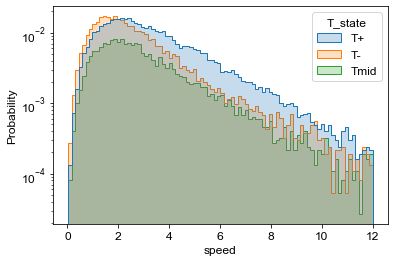

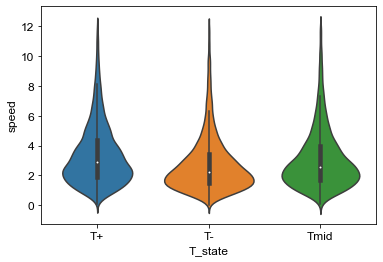

In [14]:
import seaborn as sns
# T_thr = [130, 160]

df_cells['T_state'] = ''
df_cells['T_state'][df_cells['mean-ch1'].values>=T_thr[1]] = 'T+'
df_cells['T_state'][(df_cells['mean-ch1'].values>=T_thr[0])&(df_cells['mean-ch1'].values<T_thr[1])] = 'Tmid'
df_cells['T_state'][df_cells['mean-ch1'].values<T_thr[0]] = 'T-'

plt.figure()
sns.histplot(df_cells, x="speed", hue="T_state", element="step", log_scale=(False,True), stat='probability')

plt.figure()
sns.violinplot(data=df_cells, x="T_state", y="speed")

#plt.figure()
#sns.barplot(data=df_cells, x="T_state", y="speed", errorbar='sd')

<IPython.core.display.Javascript object>


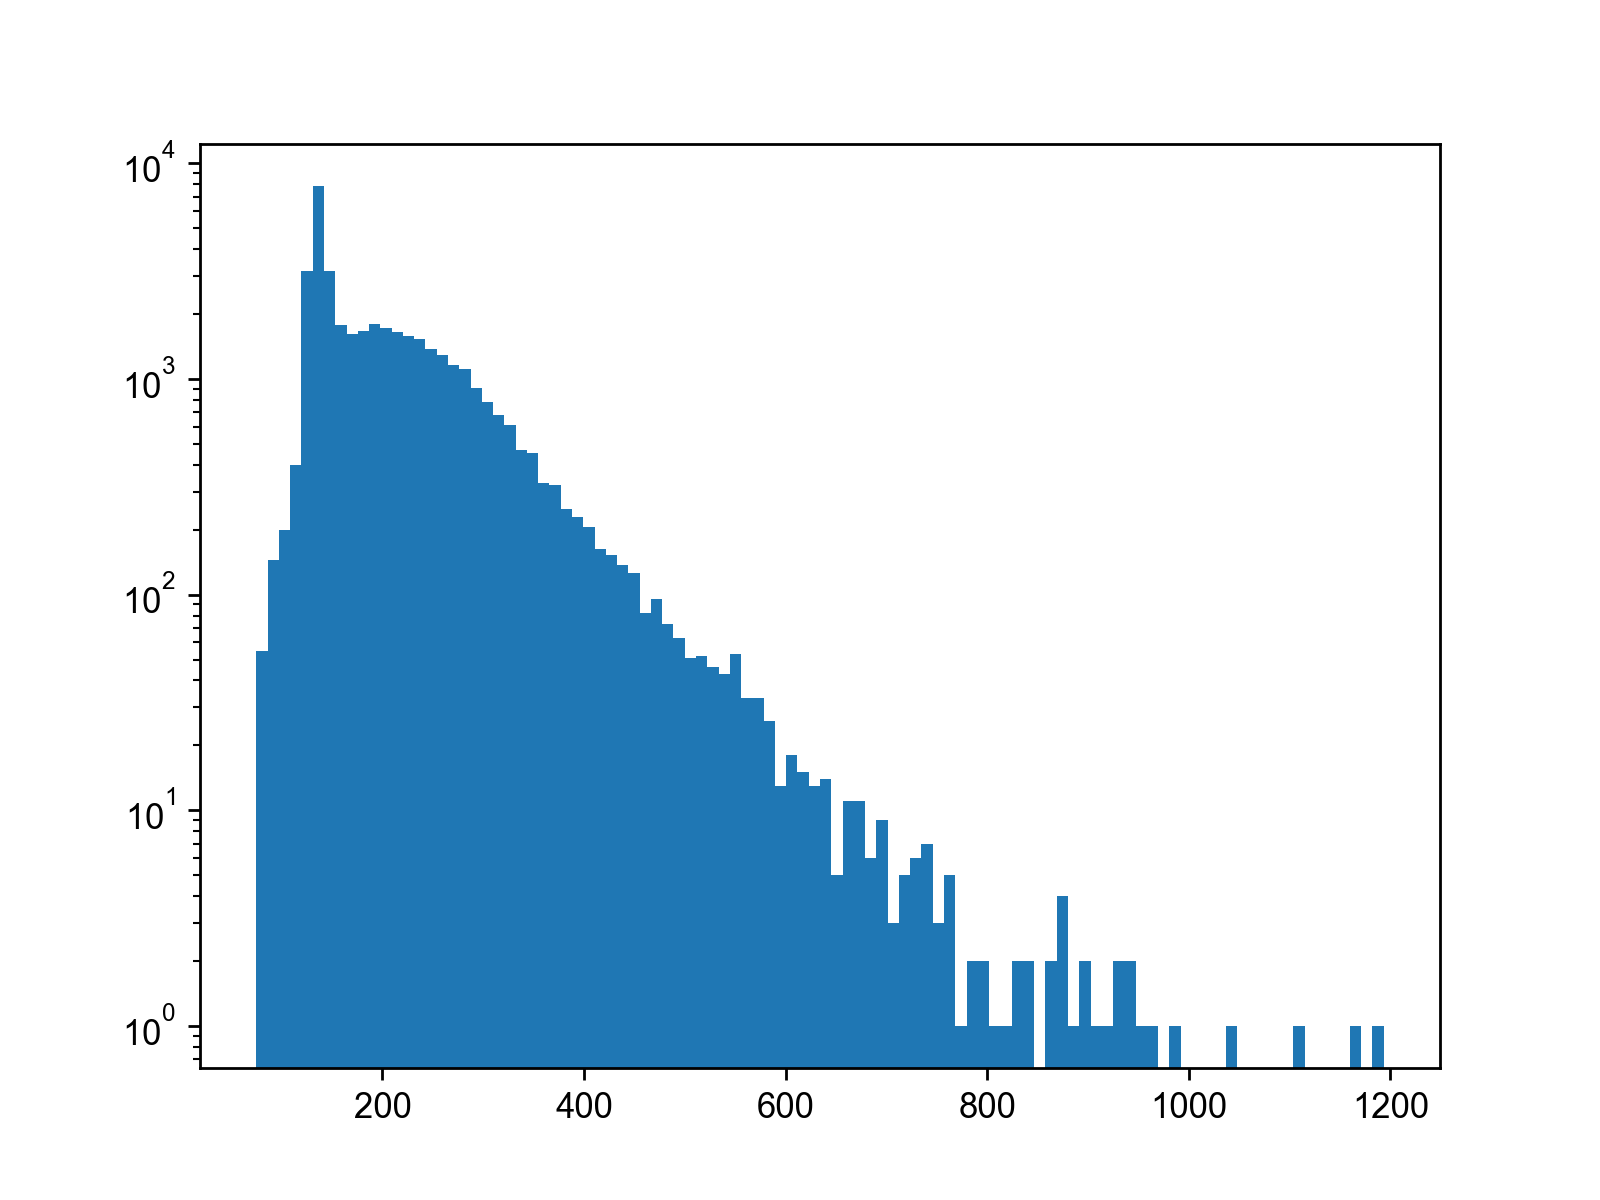

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
h, b , _ = plt.hist(df_cells['mean-ch1'].values, bins=100, log=True)

<IPython.core.display.Javascript object>


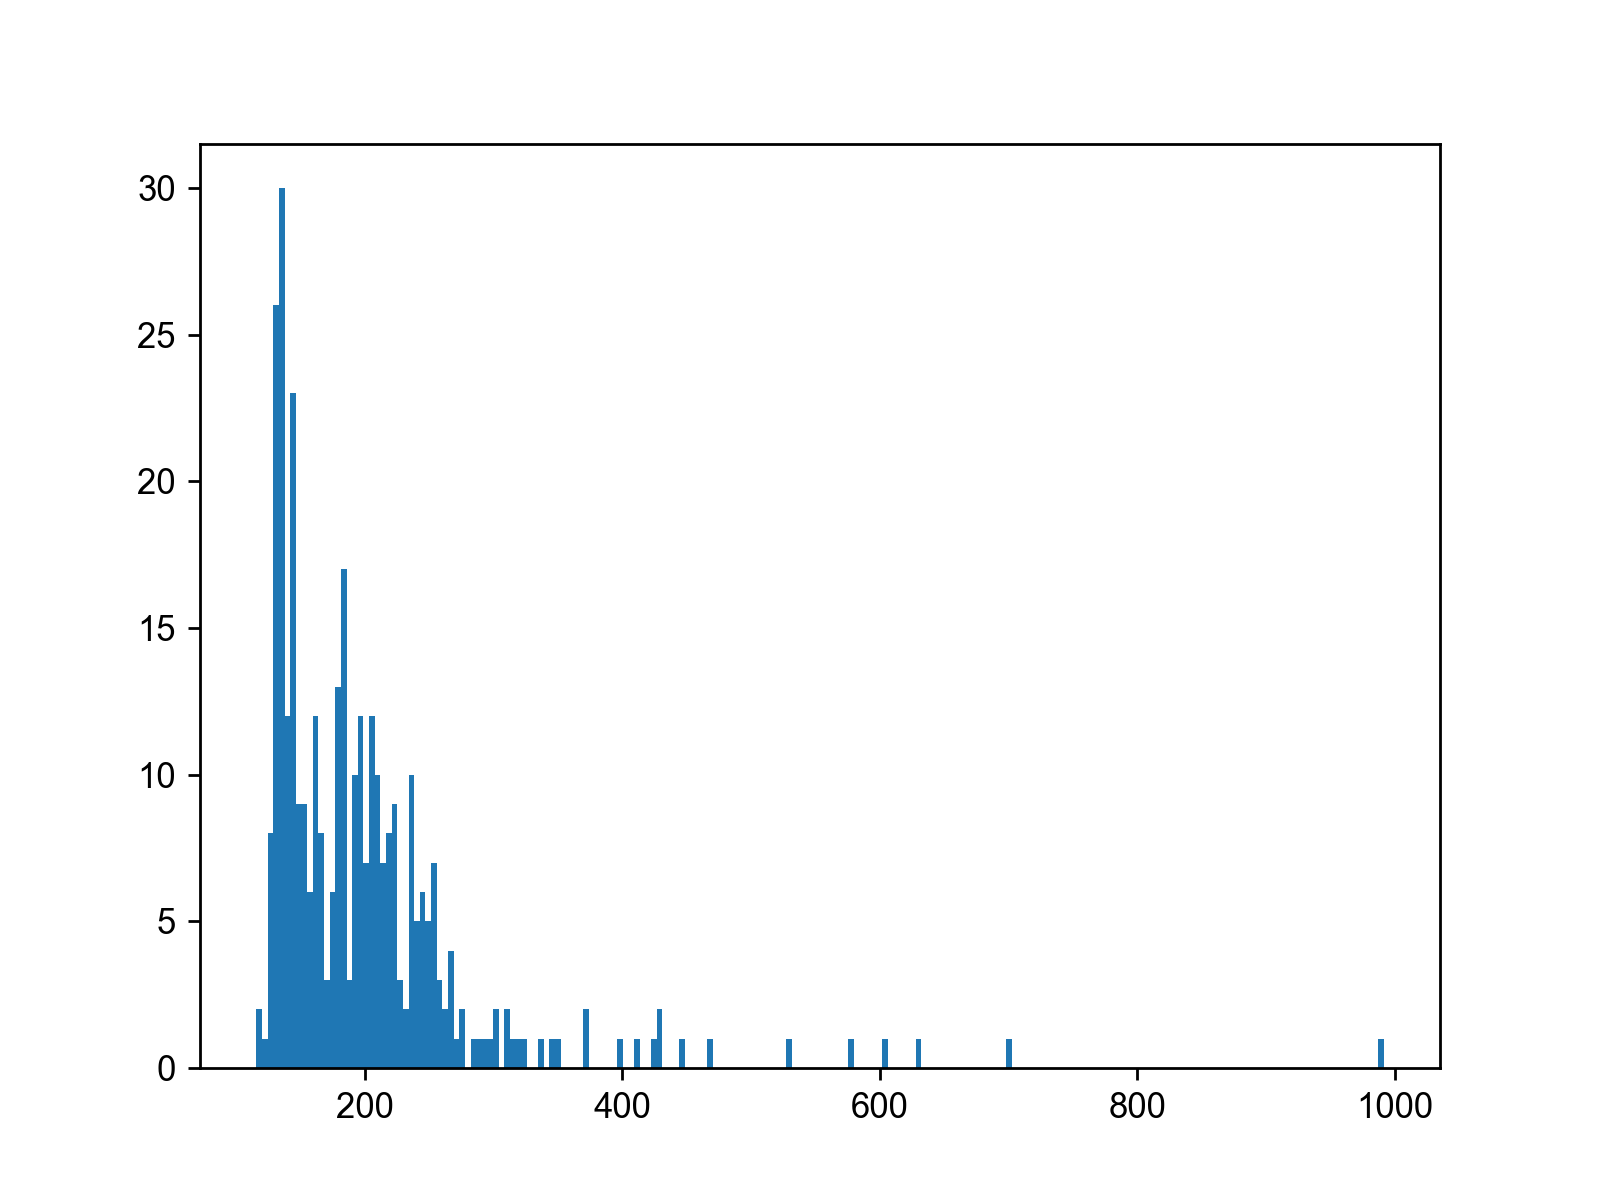

In [16]:
plt.figure()
h, b, _ = plt.hist(df_cells[df_cells.t==np.max(df_cells.t)]['mean-ch1'].values, bins=200)

## Plot for last timepoint

In [17]:
# T_thr = [130, 160]

# select only cells in last tp
df_lasttp = df_cells[df_cells.t==np.max(df_cells.t)]


cell_ids = df_lasttp.cell_id.values
T_vals = df_lasttp['mean-ch1'].values

track_Tpos = []
for T_val in T_vals:
    if T_val<T_thr[0]:
        track_Tpos.append('T-')
    if (T_val>=T_thr[0])&(T_val<T_thr[1]):
        track_Tpos.append('Tmid')
    if T_val>=T_thr[1]:
        track_Tpos.append('T+')


In [18]:
# find out cell index 
idxs = [list(df_tracks.cell_id.values).index(i) for i in cell_ids]

In [19]:
df_tracks_lasttp = df_tracks.iloc[idxs]

In [20]:
df_tracks_lasttp['T_state'] = track_Tpos

C:\Users\anlas\AppData\Local\Temp/ipykernel_468/1426327704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks_lasttp['T_state'] = track_Tpos


In [21]:
df_tracks_lasttp = df_tracks_lasttp[df_tracks_lasttp.len>10]

<IPython.core.display.Javascript object>


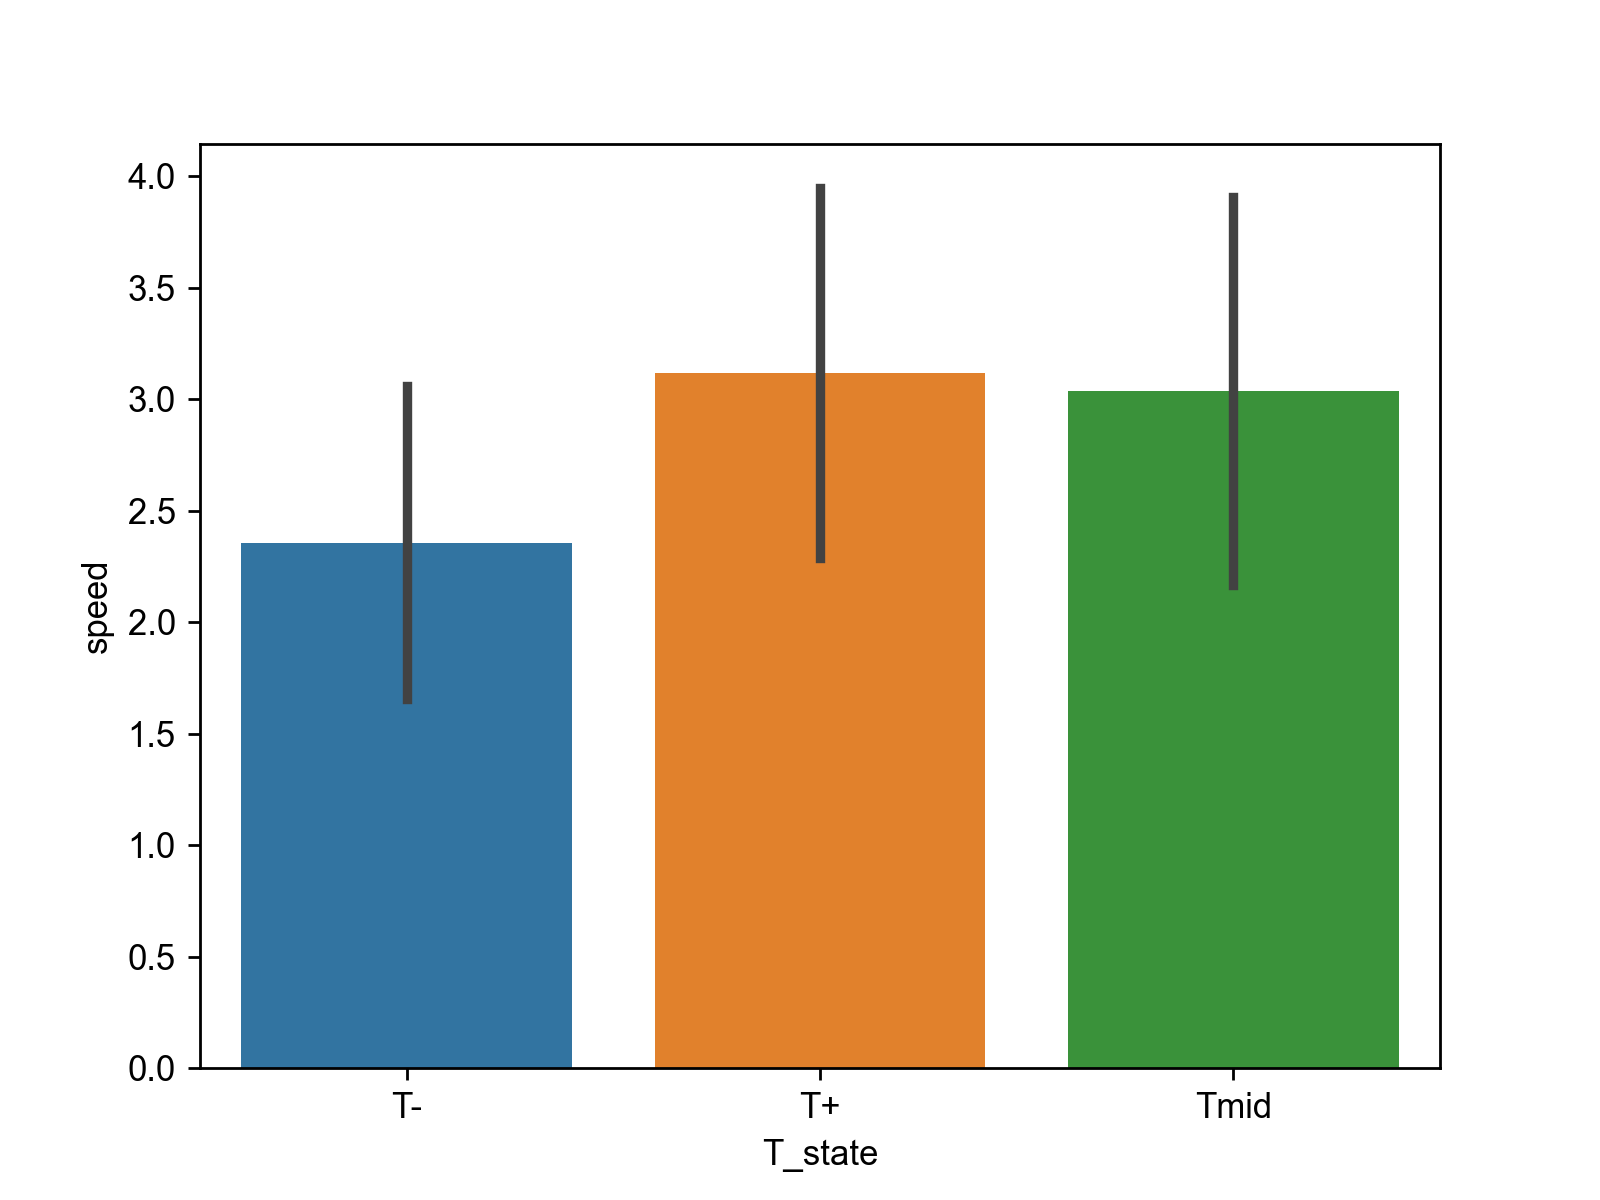

<AxesSubplot:xlabel='T_state', ylabel='speed'>

In [22]:
#200
plt.figure()
sns.barplot(data=df_tracks_lasttp, x='T_state', y='speed', ci='sd')

### Velocity plot at different time points

T_threshold=150

For each timepoint tp, use cells in the time windfow tp-10, tp+10, and filter out track shorter than 5 tp.

Then, compute which tracks are T positive and make the velocity plot, cumdist plot and end2end plot

In [28]:
# T_thr = [130, 160]
tps = np.linspace(0,200,11)
tps = [25,50,75,100]

df_tracks_tps = pd.DataFrame({})

for tp in tqdm(tps):
    # filter cells around that tp
    df_tp_original = df_cells[(df_cells.t>(tp-10))&(df_cells.t<(tp+10))]
    track_ids_original = list(set(df_tp_original.cell_id.values))

    # remove short tracks
    df_tp = pd.DataFrame({})
    for track_id in track_ids_original:
        df_cell = df_tp_original[df_tp_original.cell_id==track_id]
        if len(df_cell)>5:
            df_tp = pd.concat([df_tp,df_cell])
    df_tp = df_tp.reset_index(drop=True)
    
    # find out ids of remaining cells
    track_ids = list(set(df_tp.cell_id.values))

    # compute T positive/negative and mid cells
    T_vals = np.array([np.mean(df_tp[df_tp.cell_id==track_id]['mean-ch1'].values) for track_id in track_ids])
    track_Tpos = []
    for T_val in T_vals:
        if T_val<T_thr[0]:
            track_Tpos.append('T-')
        if (T_val>=T_thr[0])&(T_val<T_thr[1]):
            track_Tpos.append('Tmid')
        if T_val>=T_thr[1]:
            track_Tpos.append('T+')

    # compute mean velocity
    mean_vel = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        mean_vel.append(np.mean(np.linalg.norm(np.diff(pos,axis=0),axis=1)))
        
    # compute cumdist
    cum_dist = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        cum_dist.append(np.sum(np.linalg.norm(np.diff(pos,axis=0),axis=1))/(pos.shape[0]-1))
    
    # compute endo2end
    end2end = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        end2end.append(np.linalg.norm(pos[0]-pos[-1])/pos.shape[0])
        
    df_tracks_tp = pd.DataFrame({
        'tp': tp,
        'cell_id': track_ids,
        'T_state': track_Tpos,
        'speed': mean_vel,
        'cumdist': cum_dist,
        'end2end': end2end,
    })
    
    df_tracks_tps = pd.concat([df_tracks_tps, df_tracks_tp])
    
df_tracks_tps = df_tracks_tps.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.01s/it]


<IPython.core.display.Javascript object>


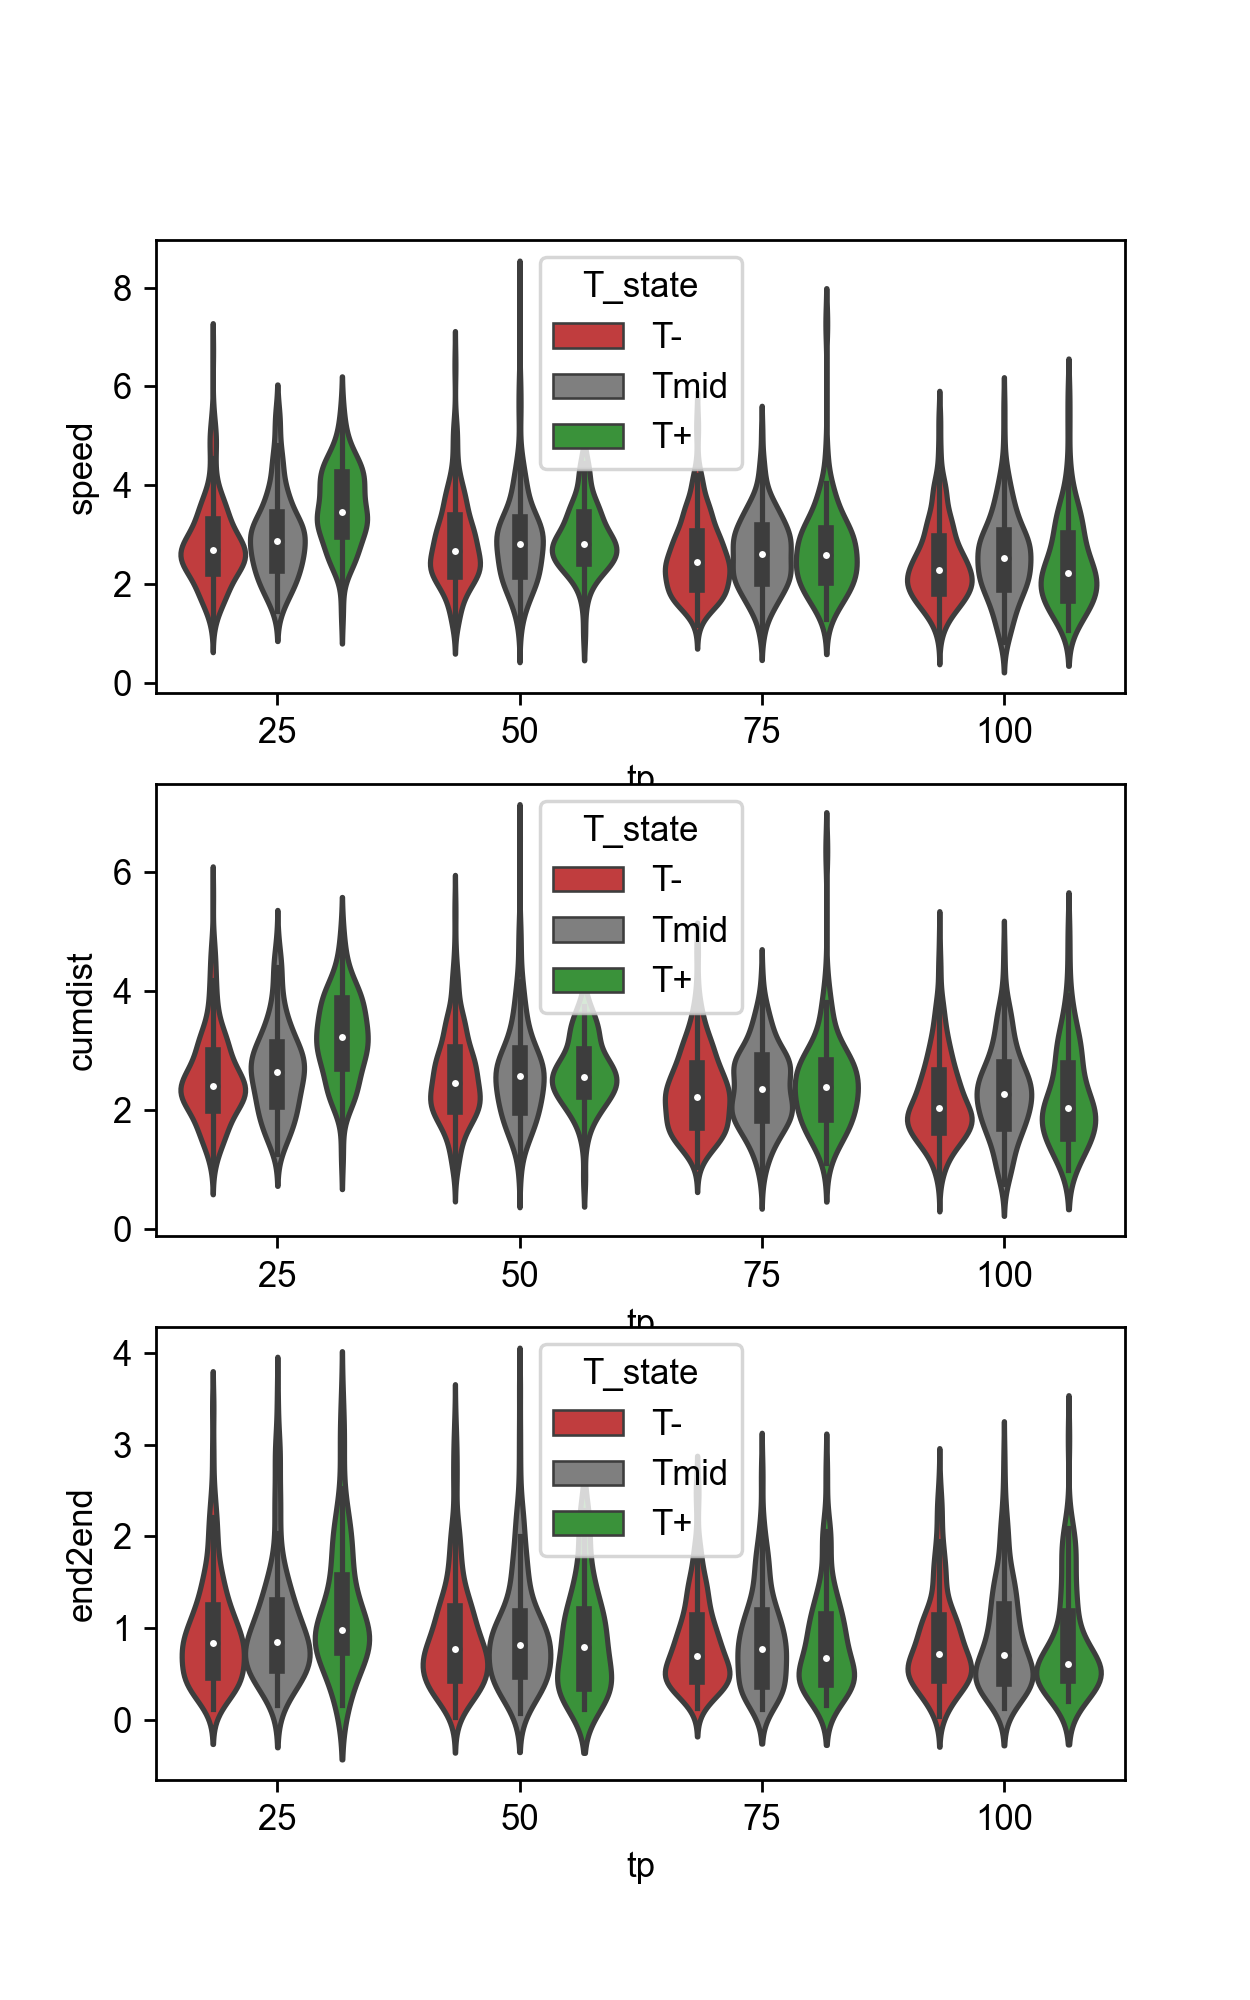

meta NOT subset; don't know how to subset; dropped


In [29]:
colors = ['tab:red','tab:gray','tab:green']*4
hue_order = ['T-','Tmid','T+']

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,8))
#sns.barplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)

sns.violinplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
sns.violinplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
sns.violinplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)


fig.savefig('Tpos_vsTneg.pdf')

### T positive activation

If cell i is positive, what fraction of the 5 closest cells will be positive after 10 timepoints? Compute number of positive cells at tp+10 - number of positive cells at tp. How does it change in funcrion of tp?

In [87]:
from scipy.ndimage import gaussian_filter1d

track_ids = df_tracks['cell_id'].values

In [88]:
track_ids


array([   0,    1,    2, ..., 1976, 1977, 1978], dtype=int64)

In [89]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  156.372240  641.495268  158.326385  166.450867   
1          1        1  171.816382  848.591359  162.717006  174.964568   
...      ...      ...         ...         ...         ...         ...   
47149  47268        1  201.388730  397.867240  206.900116  212.074247   
47150  47270        1  158.854149  743.719195  260.449077  315.489789   

             z    t         r  track_id  track_n_spots  cell_id     speed  \
0      35.1136    0  3.673884         0             31        0  2.259575   
1      31.1066    0  3.925749      1004             21        1  4.336335   
...        ...  ...       ...       ...            ...      ...       ...   
47149  24.3908  199  3.770066       947            364     1934       NaN   
47150  87.4950  199  3.967094       985            345     1953       NaN   

         T+  
0      True  
1      True  
...     ...  
47149  True  
47150  True  

[47151 rows x 14 columns]

In [90]:
df_cells['ch1_filt'] = 0.
df_cells['T+_filt'] = False
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ch1_filt = gaussian_filter1d(df_cell['mean-ch1'].values,1.5)
    df_cells.loc[df_cells.cell_id==t,'ch1_filt'] = ch1_filt
    df_cells.loc[df_cells.cell_id==t,'T+_filt'] = ch1_filt>150

In [91]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  156.372240  641.495268  158.326385  166.450867   
1          1        1  171.816382  848.591359  162.717006  174.964568   
...      ...      ...         ...         ...         ...         ...   
47149  47268        1  201.388730  397.867240  206.900116  212.074247   
47150  47270        1  158.854149  743.719195  260.449077  315.489789   

             z    t         r  track_id  track_n_spots  cell_id     speed  \
0      35.1136    0  3.673884         0             31        0  2.259575   
1      31.1066    0  3.925749      1004             21        1  4.336335   
...        ...  ...       ...       ...            ...      ...       ...   
47149  24.3908  199  3.770066       947            364     1934       NaN   
47150  87.4950  199  3.967094       985            345     1953       NaN   

         T+    ch1_filt  T+_filt  
0      True  158.174596     True  
1      True  171.191897     True  
...     ...         ...      ...  
47149  True  215.946153     True  
47150  True  157.271704     True  

[47151 rows x 16 columns]

<IPython.core.display.Javascript object>


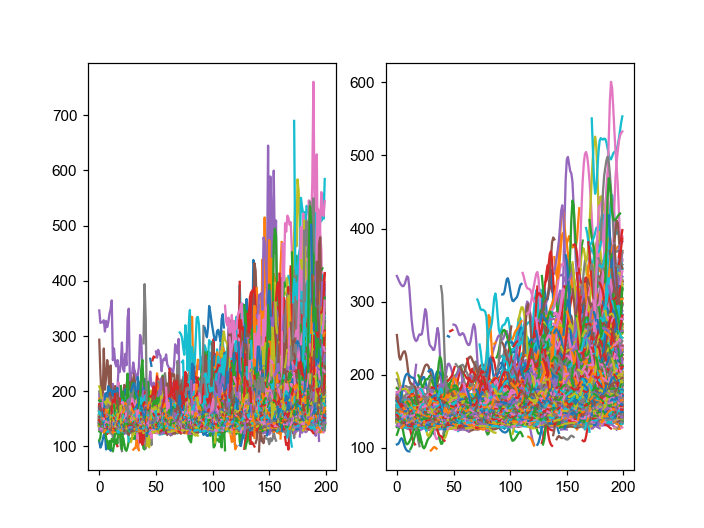

In [92]:
fig, ax = plt.subplots(1,2)

for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ax[0].plot(df_cell.t,df_cell['mean-ch1'].values)
    ax[1].plot(df_cell.t,df_cell['ch1_filt'].values)

<IPython.core.display.Javascript object>


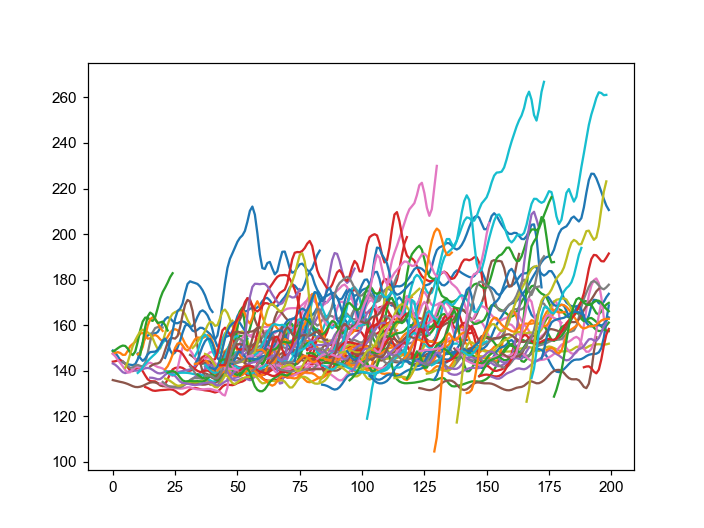

In [93]:
plt.figure()
t_thr = 150

tracks_switch = []
i = 0
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    if len(df_cell)>10:
        if df_cell.ch1_filt.values[-1]>t_thr:
            if df_cell.ch1_filt.values[0]<t_thr:
                plt.plot(df_cell.t,df_cell.ch1_filt.values)
                tracks_switch.append(df_cell.cell_id.values[0])
                i+=1

In [26]:
from sklearn.neighbors import NearestNeighbors
plt.figure()
t_thr = 150

i = 0
for tsw in tracks_switch:
    df_cell = df_cells[df_cells.cell_id==tsw]
    
    # find last tp that cell is negative
    last_tp = df_cell[df_cell['T+_filt']==False].iloc[-1].t
    my_pos = df_cell[df_cell.t==last_tp][['x','y','z']].to_numpy()
    
    # compute distances to all other cells
    df_cells_tp = df_cells[df_cells.t==last_tp]
    others_pos = df_cells_tp[['x','y','z']].to_numpy()
    others_ids = df_cells_tp.cell_id.values
    
    nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(others_pos)
    distances, indices = nbrs.kneighbors(my_pos)
    # remove the cell itself
    indices = indices[1:]
    close_ids = others_ids[indices]
    
    
    
    
    


210